# Titanic Classification Project

In [1]:
#import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading dataset
df_train = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_data.csv')

In [3]:
#first 10 data points
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#information about dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#check for null values
df_train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [6]:
#drop columns which are not required
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [7]:
#fill missing age values with mean 
mean_age = df_train['Age'].mean()
df_train['Age'].fillna(mean_age, inplace=True)

In [8]:
#find duplicate
df_train.duplicated().sum()

114

In [9]:
df_train.drop_duplicates()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.000000,1,0,7.2500
1,1,1,female,38.000000,1,0,71.2833
2,1,3,female,26.000000,0,0,7.9250
3,1,1,female,35.000000,1,0,53.1000
4,0,3,male,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.1250
887,1,1,female,19.000000,0,0,30.0000
888,0,3,female,29.699118,1,2,23.4500
889,1,1,male,26.000000,0,0,30.0000


# Testing Data

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [11]:
#finding null value
df_test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [12]:
# Drop Unnecessary Columns
df_test = df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [13]:
#fill empty age columns with mean
mean_age = df_test['Age'].mean()
df_test['Age'].fillna(mean_age, inplace=True)

mean_fare = df_test['Fare'].mean()
df_test['Fare'].fillna(mean_fare, inplace=True)

In [14]:
df_test.duplicated().sum()

40

In [15]:
df_test.drop_duplicates()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.50000,0,0,7.8292
1,3,female,47.00000,1,0,7.0000
2,2,male,62.00000,0,0,9.6875
3,3,male,27.00000,0,0,8.6625
4,3,female,22.00000,1,1,12.2875
...,...,...,...,...,...,...
411,1,female,37.00000,1,0,90.0000
412,3,female,28.00000,0,0,7.7750
414,1,female,39.00000,0,0,108.9000
415,3,male,38.50000,0,0,7.2500


# # Data Visualisation

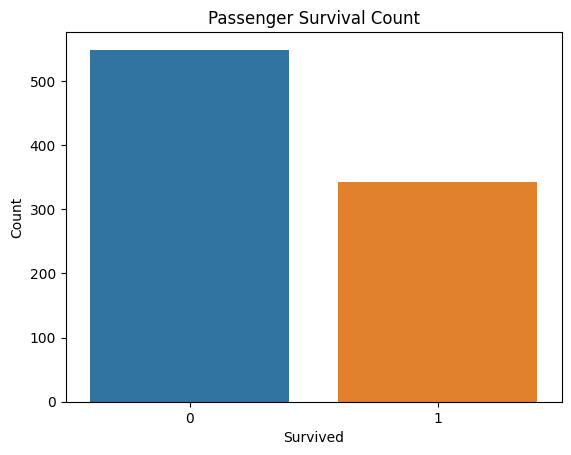

In [16]:
#bar plot of who survived vs who did not
sns.countplot(x="Survived", data=df_train)
plt.title("Passenger Survival Count")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

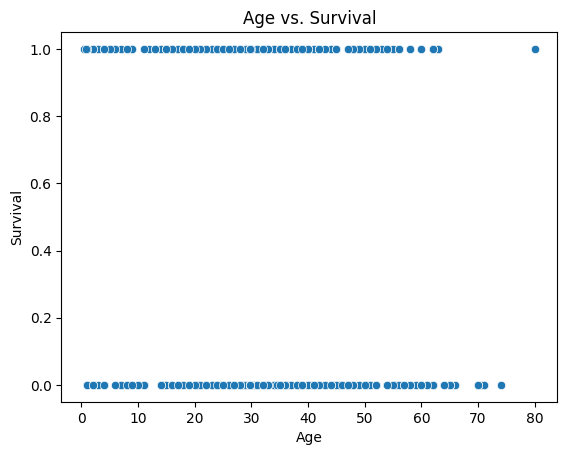

In [19]:
# scatterplot of relationship between age and survival
sns.scatterplot(y="Survived", x="Age", data=df_train)
plt.title("Age vs. Survival")
plt.xlabel("Age")
plt.ylabel("Survival")
plt.show()

C:\Users\ankush patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


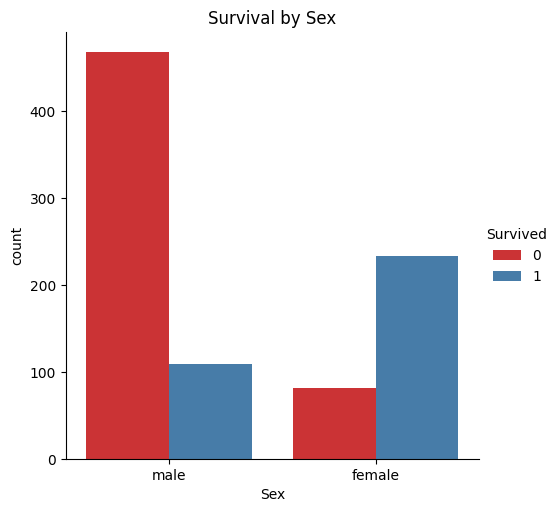

In [20]:
#relationship brtween sex and survival
sns.catplot(x="Sex", hue="Survived", kind="count", data=df_train, palette="Set1")
plt.title('Survival by Sex')
plt.show()

C:\Users\ankush patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


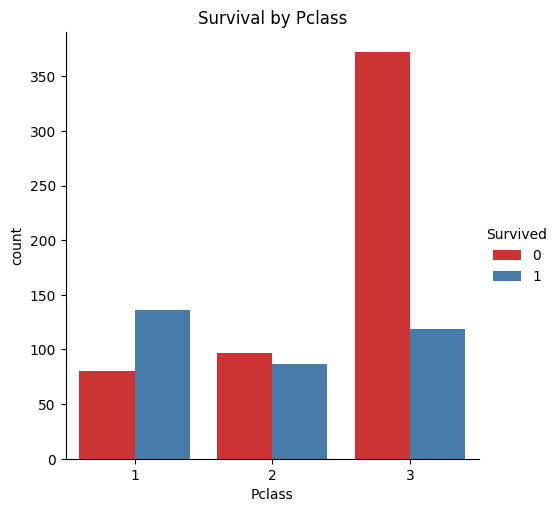

In [21]:
#relationship between pclass and survival
sns.catplot(x="Pclass", hue="Survived", kind="count", data=df_train, palette="Set1")
plt.title('Survival by Pclass')
plt.show()

C:\Users\ankush patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


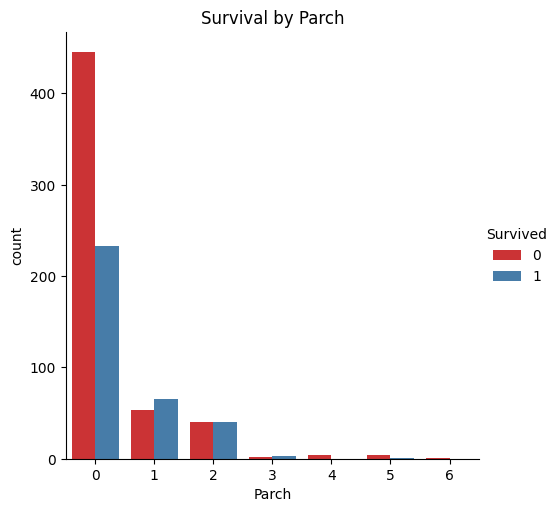

In [22]:
#relationship between parch(parent/children) and survival
sns.catplot(x="Parch", hue="Survived", kind="count", data=df_train, palette="Set1")
plt.title('Survival by Parch')
plt.show()

# Data Preprocessing

In [23]:
#one hot encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['Sex'] = le.fit_transform(df_train['Sex'])
df_test['Sex'] = le.fit_transform(df_test['Sex'])

In [32]:
X = df_train.drop("Survived",axis = 1)
y = df_train["Survived"]

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
#75% data is for training purpose and 25% for testing purporse.
#Accuracy of the model will vary as data will be picked randomly.

print("Shape of X_train: {}".format(X_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (668, 6)
Shape of y_train: (668,)
Shape of X_test: (223, 6)
Shape of y_test: (223,)


# Machine Learning Models

#  Linear Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
model1 = logistic_regression.predict(X_test)
print('Training accuracy on Logistic Regression:',accuracy_score(y_test,model1))

Training accuracy on Logistic Regression: 0.8071748878923767


# Support Vector Machines

In [35]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
model2 = svm.predict(X_test)
print('Training accuracy on SVM:', accuracy_score(y_test,model2))

Training accuracy on SVM: 0.7847533632286996


# K-Nearest Neighbors

In [36]:
#Using KNN Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
model3 = knn.predict(X_test)
print("Training accuracy on K-Nearest Neighbors :",accuracy_score(y_test,model3))

Training accuracy on K-Nearest Neighbors : 0.6905829596412556


# Gaussian NB

In [37]:
#Using GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
model4 = gnb.predict(X_test)
print("Training accuracy on Gaussian NB :",accuracy_score(y_test,model4))

Training accuracy on Gaussian NB : 0.7802690582959642


# Decision Tree

In [38]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy',random_state=42)
dtree.fit(X_train,y_train)
model5 = dtree.predict(X_test)

from sklearn.metrics import accuracy_score
print("Training accuracy on Decision Tree:",accuracy_score(y_test,model5))

Training accuracy on Decision Tree: 0.7533632286995515


In [39]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines','KNN','Gaussian NB' ,'Decision Tree'],
    'Score': [0.80,0.78,0.69,0.78,0.75]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(5)

,Model
Score,
0.80,Logistic Regression
0.78,Support Vector Machines
0.78,Gaussian NB
0.75,Decision Tree
0.69,KNN


## We can see that Logistic Regression is giving more accuracy than other Machine Learning Models.
### Note: Data is picked randomly so the accuracy may change.

## Pclass, Sex, Age, SibSp, Parch were the major factors that were helping us to predict whether the person will survive or not.

## We have removed other factors like PassengerId, Name, Ticket, Cabin, Embarked which were unnecessary for predciting survival.